In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/home/curse/Downloads/aei_fm_salpest09__custom_1145078_linear.csv')
df

,DATAFLOW,LAST UPDATE,freq,pesticid,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,F,KG,AT,2011,1544218.0,NaN
1,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,F,KG,AT,2012,1634371.0,NaN
2,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,F,KG,AT,2013,1492799.0,NaN
3,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,F,KG,AT,2014,1641055.0,NaN
4,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,F,KG,AT,2015,2130973.0,NaN
...,...,...,...,...,...,...,...,...,...
1640,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,ZR,KG,UK,2015,NaN,cd
1641,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,ZR,KG,UK,2016,NaN,c
1642,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,ZR,KG,UK,2017,270493.0,NaN
1643,ESTAT:AEI_FM_SALPEST09(1.0),12/07/22 11:00:00,A,ZR,KG,UK,2018,NaN,c


In [8]:
col = df.columns
col

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'pesticid', 'unit', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [9]:
col = ['pesticid', 'geo', 'TIME_PERIOD', 'OBS_VALUE']
df = df[col]
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,UK,2015,NaN
1641,ZR,UK,2016,NaN
1642,ZR,UK,2017,270493.0
1643,ZR,UK,2018,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pesticid     1645 non-null   object 
 1   geo          1645 non-null   object 
 2   TIME_PERIOD  1645 non-null   int64  
 3   OBS_VALUE    1522 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 51.5+ KB


In [11]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,1645.000000,1.522000e+03
mean,2015.116109,2.379319e+06
std,2.572882,5.819536e+06
min,2011.000000,0.000000e+00
25%,2013.000000,3.055200e+04
50%,2015.000000,2.702630e+05
75%,2017.000000,1.711014e+06
max,2019.000000,4.357447e+07


In [12]:
col = ['pesticid', 'geo',]
df.loc[:, col] = df[col].astype('category')
df[col].describe()

/tmp/ipykernel_30389/385671532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = df[col].astype('category')


,pesticid,geo
count,1645,1645
unique,6,32
top,F,AT
freq,277,54


In [13]:
df['pesticid'].cat.categories

Index(['F', 'H', 'I', 'M', 'PGR', 'ZR'], dtype='object')

In [14]:
df['geo'].unique()

['AT', 'BE', 'BG', 'CH', 'CY', ..., 'SE', 'SI', 'SK', 'TR', 'UK']
Length: 32
Categories (32, object): ['AT', 'BE', 'BG', 'CH', ..., 'SI', 'SK', 'TR', 'UK']

In [15]:
df.loc[:, 'geo'] = df['geo'].cat.add_categories(["GB", "GR"])

/tmp/ipykernel_30389/3022007733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'geo'] = df['geo'].cat.add_categories(["GB", "GR"])


In [16]:
pd.options.mode.chained_assignment = None  # swich of the warnings
mask = df['geo'] == 'UK' # Binary mask
df.loc[mask, 'geo'] = "GB" # Change the values for the mask
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,GB,2015,NaN
1641,ZR,GB,2016,NaN
1642,ZR,GB,2017,270493.0
1643,ZR,GB,2018,NaN


In [17]:
mask = df['geo'] == 'EL'
df.loc[mask, 'geo'] = "GR"
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,GB,2015,NaN
1641,ZR,GB,2016,NaN
1642,ZR,GB,2017,270493.0
1643,ZR,GB,2018,NaN


In [18]:
import pycountry

In [19]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]  # create a list of country codes
print("Country codes", list_alpha_2)

def country_flag(df):
    '''
    df: Series
    return: Full name of counry or "Invalide code"
    '''
    if (df['geo'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['geo']).name
    else:
        print(df['geo'])
        return 'Invalid Code'

df['country_name']=df.apply(country_flag, axis = 1)
df

Country codes ['AW', 'AF', 'AO', 'AI', 'AX', 'AL', 'AD', 'AE', 'AR', 'AM', 'AS', 'AQ', 'TF', 'AG', 'AU', 'AT', 'AZ', 'BI', 'BE', 'BJ', 'BQ', 'BF', 'BD', 'BG', 'BH', 'BS', 'BA', 'BL', 'BY', 'BZ', 'BM', 'BO', 'BR', 'BB', 'BN', 'BT', 'BV', 'BW', 'CF', 'CA', 'CC', 'CH', 'CL', 'CN', 'CI', 'CM', 'CD', 'CG', 'CK', 'CO', 'KM', 'CV', 'CR', 'CU', 'CW', 'CX', 'KY', 'CY', 'CZ', 'DE', 'DJ', 'DM', 'DK', 'DO', 'DZ', 'EC', 'EG', 'ER', 'EH', 'ES', 'EE', 'ET', 'FI', 'FJ', 'FK', 'FR', 'FO', 'FM', 'GA', 'GB', 'GE', 'GG', 'GH', 'GI', 'GN', 'GP', 'GM', 'GW', 'GQ', 'GR', 'GD', 'GL', 'GT', 'GF', 'GU', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IM', 'IN', 'IO', 'IE', 'IR', 'IQ', 'IS', 'IL', 'IT', 'JM', 'JE', 'JO', 'JP', 'KZ', 'KE', 'KG', 'KH', 'KI', 'KN', 'KR', 'KW', 'LA', 'LB', 'LR', 'LY', 'LC', 'LI', 'LK', 'LS', 'LT', 'LU', 'LV', 'MO', 'MF', 'MA', 'MC', 'MD', 'MG', 'MV', 'MX', 'MH', 'MK', 'ML', 'MT', 'MM', 'ME', 'MN', 'MP', 'MZ', 'MR', 'MS', 'MQ', 'MU', 'MW', 'MY', 'YT', 'NA', 'NC', 'NE', 'NF', 'NG', '

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name
0,F,AT,2011,1544218.0,Austria
1,F,AT,2012,1634371.0,Austria
2,F,AT,2013,1492799.0,Austria
3,F,AT,2014,1641055.0,Austria
4,F,AT,2015,2130973.0,Austria
...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom
1641,ZR,GB,2016,NaN,United Kingdom
1642,ZR,GB,2017,270493.0,United Kingdom
1643,ZR,GB,2018,NaN,United Kingdom


In [20]:
pes = {'F': 'Fungicides and bactericides',
      'H': 'Herbicides, haulm destructors and moss killers',
      'I': 'Insecticides and acaricides',
      'M': 'Molluscicides',
      'PGR': 'Plant growth regulators',
      'ZR': 'Other plant protection products'}

In [21]:
df['pesticid_name'] = df['pesticid'].map(pes)
df['pesticid_name'] = df['pesticid_name'].astype('category')
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,1544218.0,Austria,Fungicides and bactericides
1,F,AT,2012,1634371.0,Austria,Fungicides and bactericides
2,F,AT,2013,1492799.0,Austria,Fungicides and bactericides
3,F,AT,2014,1641055.0,Austria,Fungicides and bactericides
4,F,AT,2015,2130973.0,Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom,Other plant protection products
1641,ZR,GB,2016,NaN,United Kingdom,Other plant protection products
1642,ZR,GB,2017,270493.0,United Kingdom,Other plant protection products
1643,ZR,GB,2018,NaN,United Kingdom,Other plant protection products


In [22]:
df['pesticid_name'].value_counts().to_frame()

,pesticid_name
Fungicides and bactericides,277
"Herbicides, haulm destructors and moss killers",277
Insecticides and acaricides,277
Plant growth regulators,273
Other plant protection products,272
Molluscicides,269


In [23]:
pd.options.display.float_format = '{:,.0f}'.format
df.groupby('pesticid_name')['OBS_VALUE'].sum().sort_values(ascending=False).to_frame()

,OBS_VALUE
pesticid_name,
Fungicides and bactericides,"1,526,089,041"
"Herbicides, haulm destructors and moss killers","1,212,490,581"
Insecticides and acaricides,"383,216,953"
Other plant protection products,"361,363,116"
Plant growth regulators,"125,792,561"
Molluscicides,"12,370,617"


In [24]:
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,"1,544,218",Austria,Fungicides and bactericides
1,F,AT,2012,"1,634,371",Austria,Fungicides and bactericides
2,F,AT,2013,"1,492,799",Austria,Fungicides and bactericides
3,F,AT,2014,"1,641,055",Austria,Fungicides and bactericides
4,F,AT,2015,"2,130,973",Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom,Other plant protection products
1641,ZR,GB,2016,NaN,United Kingdom,Other plant protection products
1642,ZR,GB,2017,"270,493",United Kingdom,Other plant protection products
1643,ZR,GB,2018,NaN,United Kingdom,Other plant protection products


In [25]:
df = df.dropna()
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,"1,544,218",Austria,Fungicides and bactericides
1,F,AT,2012,"1,634,371",Austria,Fungicides and bactericides
2,F,AT,2013,"1,492,799",Austria,Fungicides and bactericides
3,F,AT,2014,"1,641,055",Austria,Fungicides and bactericides
4,F,AT,2015,"2,130,973",Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1635,ZR,TR,2019,"11,393,214",Turkey,Other plant protection products
1636,ZR,GB,2011,"17,914",United Kingdom,Other plant protection products
1637,ZR,GB,2012,"10,805",United Kingdom,Other plant protection products
1642,ZR,GB,2017,"270,493",United Kingdom,Other plant protection products


In [26]:
p_df = df.pivot_table(values='OBS_VALUE', index= [ 'country_name', 'TIME_PERIOD',], columns=['pesticid_name'], aggfunc=np.sum, margins=False, dropna=False, fill_value=0)
p_df

pesticid_name               Fungicides and bactericides  \
country_name   TIME_PERIOD                                
Austria        2011                             1544218   
               2012                             1634371   
               2013                             1492799   
               2014                             1641055   
               2015                             2130973   
...                                                 ...   
United Kingdom 2015                             6032359   
               2016                             5330003   
               2017                             5484053   
               2018                             4492460   
               2019                             6056984   

pesticid_name               Herbicides, haulm destructors and moss killers  \
country_name   TIME_PERIOD                                                   
Austria        2011                                                1505163   
               2012                                                1544519   
               2013                                                1227017   
               2014                                                1375815   
               2015                                                1317219   
...                                                                    ...   
United Kingdom 2015                                               11463648   
               2016                                                9810278   
               2017                                                9681731   
               2018                                               10891852   
               2019                                                9890402   

pesticid_name               Insecticides and acaricides  Molluscicides  \
country_name   TIME_PERIOD                                               
Austria        2011                              247982          33428   
               2012                              244079          23653   
               2013                              238252          13471   
               2014                              240298          16180   
               2015                              195649          21214   
...                                                 ...            ...   
United Kingdom 2015                              657938              0   
               2016                              347876              0   
               2017                              433843              0   
               2018                              131984              0   
               2019                              226423              0   

pesticid_name               Plant growth regulators  \
country_name   TIME_PERIOD                            
Austria        2011                           59369   
               2012                           67373   
               2013                           45386   
               2014                           53530   
               2015                           68722   
...                                             ...   
United Kingdom 2015                         3171290   
               2016                               0   
               2017                               0   
               2018                               0   
               2019                               0   

pesticid_name               Other plant protection products  
country_name   TIME_PERIOD                                   
Austria        2011                                   58114  
               2012                                   43028  
               2013                                   80517  
               2014                                   46345  
               2015                                   43840  
...                                                     ...  
United Kingdom 2015                       

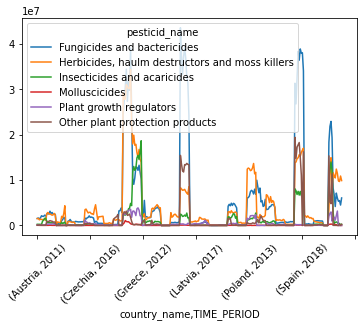

In [27]:
p_df.plot()
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.show()

In [28]:
pd.options.display.float_format = '{:,.2f}'.format
p_df.corr()

pesticid_name,Fungicides and bactericides,"Herbicides, haulm destructors and moss killers",Insecticides and acaricides,Molluscicides,Plant growth regulators,Other plant protection products
pesticid_name,,,,,,
Fungicides and bactericides,1.00,0.76,0.54,0.58,0.43,0.81
"Herbicides, haulm destructors and moss killers",0.76,1.00,0.60,0.79,0.81,0.37
Insecticides and acaricides,0.54,0.60,1.00,0.42,0.65,0.40
Molluscicides,0.58,0.79,0.42,1.00,0.69,0.23
Plant growth regulators,0.43,0.81,0.65,0.69,1.00,0.06
Other plant protection products,0.81,0.37,0.40,0.23,0.06,1.00


In [29]:
proportion_train_test = 0.7
l = int(proportion_train_test * len(p_df))
col = p_df.columns

In [30]:
X_train, X_test, y_train, y_test = p_df[col[1:]][:l], p_df[col[1:]][l:], p_df[col[0]][:l], p_df[col[0]][l:]

In [31]:
# sklearn function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_df[col[1:]], p_df[col[0]], test_size=0.3, shuffle=False)

In [32]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (201, 5)
X_test (87, 5)
y_train (201,)
y_test (87,)


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [34]:
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.9624148301297647
Correlation test 0.6893198684759501
Coefficients: [ 0.79147494  0.14544074  8.04557541 -1.59964183  2.12274426]
Pair the feature names with the coefficients:
Herbicides, haulm destructors and moss killers : 0.7914749403510315
Insecticides and acaricides : 0.14544074389597225
Molluscicides : 8.045575412337426
Plant growth regulators : -1.5996418299767843
Other plant protection products : 2.122744264091209
Intercept -173472.58970514033
Mean Absolute Error (train): 1039629.1733770387
Mean Absolute Error (test): 2701721.4099141583
Mean Squared Error (train): 3237518415390.0425
Mean Squared Error (test): 34798969449756.793
Root Mean Squared Error (train): 1799310.5388981753
Root Mean Squared Error (test): 5899065.1335408045


In [35]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred_test_OLS = results.predict(X_test)
y_pred_train_OLS = results.predict(X_train)
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Fungicides and bactericides   R-squared (uncentered):                   0.969
Model:                                     OLS   Adj. R-squared (uncentered):              0.969
Method:                          Least Squares   F-statistic:                              1245.
Date:                         Wed, 13 Jul 2022   Prob (F-statistic):                   2.21e-146
Time:                                 04:28:24   Log-Likelihood:                         -3180.8
No. Observations:                          201   AIC:                                      6372.
Df Residuals:                              196   BIC:                                      6388.
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
                              

In [36]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9694772380298767
adjusted coefficient of determination: 0.9686985961428838
regression coefficients:
Herbicides, haulm destructors and moss killers    0.77
Insecticides and acaricides                       0.15
Molluscicides                                     8.67
Plant growth regulators                          -1.65
Other plant protection products                   2.12
dtype: float64


In [37]:
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_OLS': y_pred_test_OLS})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_OLS': y_pred_train_OLS})
df_res = df_train.join(df_test, how='outer')
df_res

Actual_train  Predicted_train  \
country_name   TIME_PERIOD                                  
Austria        2011         1,544,218.00     1,351,232.41   
               2012         1,634,371.00     1,258,341.29   
               2013         1,492,799.00     1,039,029.77   
               2014         1,641,055.00     1,093,326.79   
               2015         2,130,973.00     1,051,337.94   
...                                  ...              ...   
United Kingdom 2015                  NaN              NaN   
               2016                  NaN              NaN   
               2017                  NaN              NaN   
               2018                  NaN              NaN   
               2019                  NaN              NaN   

                            Predicted_train_OLS  Actual_test  Predicted_test  \
country_name   TIME_PERIOD                                                     
Austria        2011                1,517,817.60          NaN             NaN   
               2012                1,417,797.68          NaN             NaN   
               2013                1,198,390.03          NaN             NaN   
               2014                1,251,659.82          NaN             NaN   
               2015                1,212,829.42          NaN             NaN   
...                                         ...          ...             ...   
United Kingdom 2015                         NaN 6,032,359.00    3,922,480.38   
               2016                         NaN 5,330,003.00    7,641,711.95   
               2017                         NaN 5,484,053.00    8,126,660.79   
               2018                         NaN 4,492,460.00    8,466,351.17   
               2019                         NaN 6,056,984.00    8,228,893.15   

                            Predicted_test_OLS  
country_name   TIME_PERIOD                      
Austria        2011                        NaN  
               2012                        NaN  
               2013                        NaN  
               2014                        NaN  
               2015                        NaN  
...                                        ...  
United Kingdom 2015               3,748,808.19  
               2016               7,645,067.10  
               2017               8,130,860.97  
               2018               8,449,038.24  
               2019               8,227,976.46  

[288 rows x 6 columns]

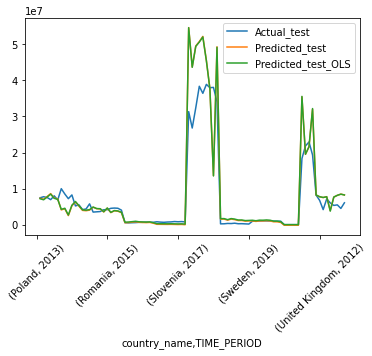

In [38]:
df_res[['Actual_test', 'Predicted_test', 'Predicted_test_OLS']].plot()
plt.xticks(rotation=45)
plt.show()

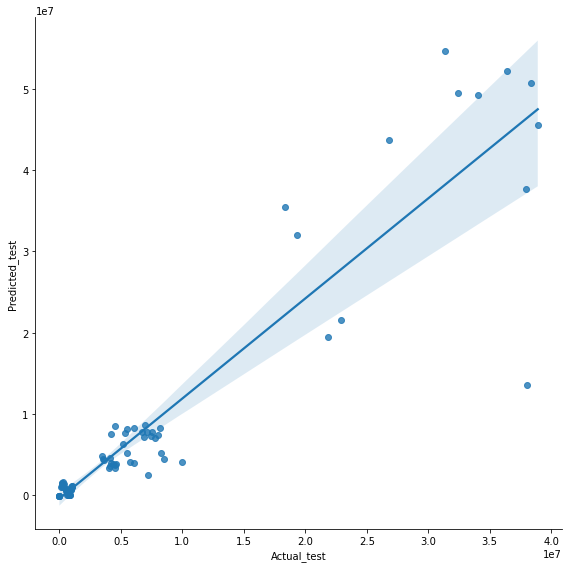

In [39]:
import seaborn as sns
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test',  kind='reg', height = 8)
plt.show()

In [40]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(random_state=1, max_iter=500)
regressor.fit(X_train, y_train)
y_pred_test_MLP = regressor.predict(X_test)
y_pred_train_MLP = regressor.predict(X_train)

In [41]:
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train_MLP))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test_MLP))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train_MLP))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test_MLP))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_MLP)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_MLP))) 

Correlation train 0.9392396585948009
Correlation test 0.82113899894134
Mean Absolute Error (train): 1267636.820845912
Mean Absolute Error (test): 2377998.107904138
Mean Squared Error (train): 5233785690044.211
Mean Squared Error (test): 20034041060367.61
Root Mean Squared Error (train): 2287746.8588207504
Root Mean Squared Error (test): 4475940.243163174


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler_x_train = MinMaxScaler(feature_range=(0, 1))
scaler_y_train = MinMaxScaler(feature_range=(0, 1))
scaler_x_test = MinMaxScaler(feature_range=(0, 1))
scaler_y_test = MinMaxScaler(feature_range=(0, 1))

# Normilized data
scaled_x_train = scaler_x_train.fit_transform(X_train.astype('float64')) 
scaled_y_train = scaler_y_train.fit_transform(y_train.astype('float64').values.reshape(-1, 1))
scaled_x_test = scaler_x_test.fit_transform(X_test.astype('float64'))
scaled_y_test = scaler_y_test.fit_transform(y_test.astype('float64').values.reshape(-1, 1))

In [43]:
def BP_model(X):
    # create model
    model = Sequential()
    #model.add(BatchNormalization(input_shape=tuple([X.shape[1]])))
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [44]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 10

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)

/tmp/ipykernel_30389/3855404876.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)


In [47]:
 fitting = True
fitting_save = True


import pickle

if fitting:
    history=estimator.fit(scaled_x_train, scaled_y_train, validation_data=(scaled_x_test, scaled_y_test))
    if fitting_save:
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model 
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)
# This is where you load the actual saved model into a new variable.
estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

2022-07-13 04:29:58.269975: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-13 04:29:58.270011: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Curse): /proc/driver/nvidia/version does not exist
2022-07-13 04:29:58.270429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Saved model to disk
Loaded model from disk


/tmp/ipykernel_30389/4250650308.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)


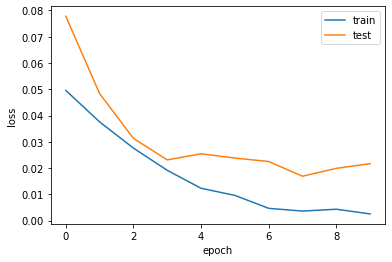

In [48]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [49]:
res_tr=estimator.predict(scaled_x_train)
res_ts=estimator.predict(scaled_x_test)
res_train_ANN=scaler_y_train.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y_test.inverse_transform(res_ts.reshape(-1, 1)).flatten()

In [50]:
print("Correlation train", regressor.score(X_train, res_train_ANN))
print("Correlation test", regressor.score(X_test, res_test_ANN))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, res_train_ANN))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, res_train_ANN))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, res_train_ANN)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN))) 

Correlation train 0.9737933316763279
Correlation test 0.9313412639827369
Mean Absolute Error (train): 1076089.1707089553
Mean Absolute Error (test): 3190986.6501436783
Mean Squared Error (train): 3789755347425.6016
Mean Squared Error (test): 32811357904353.668
Root Mean Squared Error (train): 1946729.3975860132
Root Mean Squared Error (test): 5728119.927546356


In [51]:
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_MLP': y_pred_test_MLP, 'Predicted_test_ANN': res_test_ANN})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_MLP': y_pred_train_MLP, 'Predicted_train_ANN': res_train_ANN})
df_res = df_train.join(df_test, how='outer')
df_res

Actual_train  Predicted_train  \
country_name   TIME_PERIOD                                  
Austria        2011         1,544,218.00     1,351,232.41   
               2012         1,634,371.00     1,258,341.29   
               2013         1,492,799.00     1,039,029.77   
               2014         1,641,055.00     1,093,326.79   
               2015         2,130,973.00     1,051,337.94   
...                                  ...              ...   
United Kingdom 2015                  NaN              NaN   
               2016                  NaN              NaN   
               2017                  NaN              NaN   
               2018                  NaN              NaN   
               2019                  NaN              NaN   

                            Predicted_train_MLP  Predicted_train_ANN  \
country_name   TIME_PERIOD                                             
Austria        2011                1,252,165.77         1,073,468.38   
               2012                1,253,373.89           984,933.25   
               2013                1,047,852.25           873,672.94   
               2014                1,118,716.43           888,506.25   
               2015                1,082,318.84           899,022.12   
...                                         ...                  ...   
United Kingdom 2015                         NaN                  NaN   
               2016                         NaN                  NaN   
               2017                         NaN                  NaN   
               2018                         NaN                  NaN   
               2019                         NaN                  NaN   

                            Actual_test  Predicted_test  Predicted_test_MLP  \
country_name   TIME_PERIOD                                                    
Austria        2011                 NaN             NaN                 NaN   
               2012                 NaN             NaN                 NaN   
               2013                 NaN             NaN                 NaN   
               2014                 NaN             NaN                 NaN   
               2015                 NaN             NaN                 NaN   
...                                 ...             ...                 ...   
United Kingdom 2015        6,032,359.00    3,922,480.38        8,819,313.46   
               2016        5,330,003.00    7,641,711.95        7,635,140.83   
               2017        5,484,053.00    8,126,660.79        7,922,573.67   
               2018        4,492,460.00    8,466,351.17        8,514,940.02   
               2019        6,056,984.00    8,228,893.15        8,094,233.79   

                            Predicted_test_ANN  
country_name   TIME_PERIOD                      
Austria        2011                        NaN  
               2012                        NaN  
               2013                        NaN  
               2014                        NaN  
               2015                        NaN  
...                                        ...  
United Kingdom 2015              11,812,699.00  
               2016               7,401,011.50  
               2017               7,647,481.00  
               2018               8,216,715.00  
               2019               7,769,948.00  

[288 rows x 8 columns]

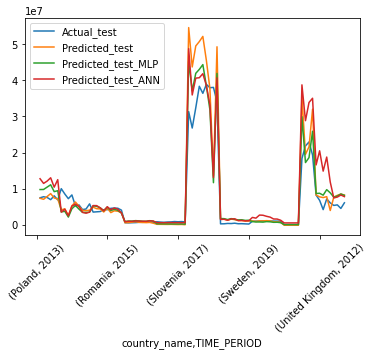

In [52]:
df_res[['Actual_test', 'Predicted_test', 'Predicted_test_MLP', 'Predicted_test_ANN', ]].plot()
plt.xticks(rotation=45)
plt.show()

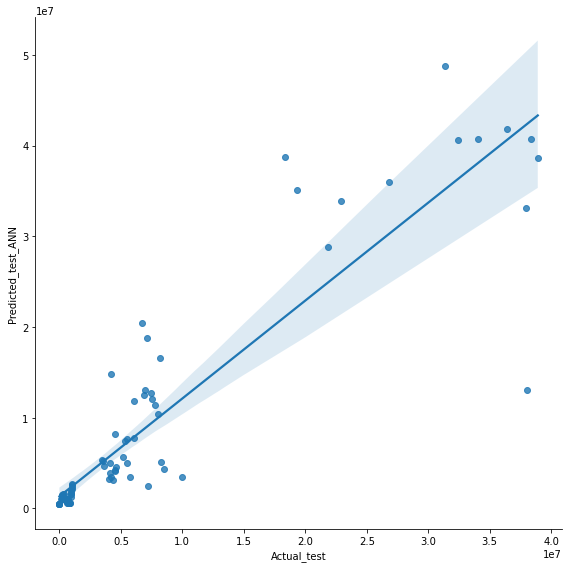

In [53]:
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test_ANN',  kind='reg', height = 8)
plt.show()